# Least-Squares Estimation of Transformation Parameters Between Two Point Patterns の読解
> "Read a thesis whose name is Least-Squares Estimation of Transformation Parameters Between Two Point Patterns"

- toc: true
- categories: [ImageProcessing, Geometry]

## はじめに
拡大と回転と並進とによって実現する幾何学変換に相似変換があります．これは，画像間の位置合わせ等に用いられます．
具体的には，互いに対応する点${x_{i}}$と$y_{i}$$\left(i = 1, 2, \dots n \right)$が与えられた時，それらの間に存在する相似変換を推定するといったものです．

これを実現アルゴリズムにS.Umeyamaによって提案された手法があります．古典的な手法ではありますが，実用的なアルゴリズムであると思います．scikit-imageにおける[SimilalityTransform](https://github.com/scikit-image/scikit-image/blob/d88b92b734875ce9adcf429786d0e3a975f5ffdd/skimage/transform/_geometric.py#L72)でも使用されています．

## やったこと

* Least-Squares Estimation of Transformation Parameters Between Two Point Patternsによる提案手法を読む
* Pythonによる簡易的な実装

## 行列の性質復習

以下にこれから利用する行列の性質を示します．ここで，$\mathbf A = \left(a_{i,j}\right)$及び$\mathbf B = \left(b_{i,j}\right)$は行列を，$\left<\cdot, \cdot\right>$は行列の内積を表します．

$$
\begin{aligned}
\mathrm {tr} \mathbf A &= \mathrm {tr} \mathbf A^{\mathrm T}  \\
\mathrm {tr} \mathbf A \mathbf B \mathbf C &= \mathrm {tr} \mathbf B \mathbf C \mathbf A \\
\mathrm {tr} \mathbf A^{\mathrm T} \mathbf B &= \left<\mathbf A, \mathbf B \right> \\
&= \left\|\mathbf A \mathbf B \right\|^{2} \\
\frac{\partial}{\partial \mathbf A} \mathrm {tr} \left(\mathbf A \mathbf B\right) &= \mathbf B^{T} \\
\frac{\partial}{\partial \mathbf A} \mathrm {tr} \left(\mathbf A^{\mathrm T} \mathbf B\right) &= \mathbf B \\
\frac{\partial}{\partial \mathbf A} \mathrm {tr} \left(f\left(\mathbf A\right) g\left(\mathbf A\right)\right) &= \frac{\partial}{\partial \mathbf A_{1}} \mathrm {tr} \left(f\left(\mathbf A_{1}\right) g\left(\mathbf A\right)\right) + \frac{\partial}{\partial \mathbf A_{2}} \mathrm {tr} \left(f\left(\mathbf A\right) g\left(\mathbf A_{2}\right)\right)  \\
\left<\mathbf A, \mathbf B \right> &= \mathrm {tr} \mathbf A^{\mathrm T} B \\
&= \sum_{i,j} a_{j,i}b_{i,j}
\end{aligned}
$$

## 相似変換について

上述したとおり，相似変換とは拡大と回転と並進とによって実現する幾何学的変換です．従って，変換元を$\mathbf x$，変換先を$\mathbf x'$，拡大率，回転行列，並進ベクトルをそれぞれ$\left(c, \mathbf R, \mathbf t \right)$とすると

$$
\begin{aligned}
\mathbf x' &= c\mathbf R \mathbf x  + \mathbf t
\end{aligned}
$$

と表されます．

ここで，特徴点$\mathbf x_{i}$と，その相似変換による変換$\mathbf y_{i}\ \left(i = 1, 2, \dots , n \right)$を観測した場合を考えます．この時，以下の$e\left(c, \mathbf R, \mathbf t\right)$を最小化することで，$\mathbf x_{i}$と$\mathbf y_{i}$から相似変換のパラメータ$\left(c, \mathbf R, \mathbf t \right)$を推定することができます．

$$
\begin{aligned}
e^{2}\left(c, \mathbf R, \mathbf t\right) &= \frac{1}{n} \sum_{i=1}^{n} \left| \mathbf y_{i} - \left(c\mathbf R \mathbf x_{i} + \mathbf t\right)\right|^{2}
\end{aligned}
$$


## 回転行列の推定

相似変換に推定の先立ち，まずは以下の式を最小化する$\mathbf R$を推定することを考えます．ここで，$\mathbf A$及び$\mathbf B$は$m \times n$の行列を，$\mathbf R$は$m \times m$の行列を表します．

$$
\begin{alignedat}{4}
 \text{minimize}  & \ \ \ \ \  &  \left\| \mathbf A - \mathbf R \mathbf B\right\|^{2}  & \\
 \text{subject to} &\ &\left|\mathbf R \right| &= 1& \\
                   &\ & \mathbf R\mathbf R^{\mathrm T} &= \mathbf I 
\end{alignedat}
$$

$\mathbf R$を適切に推定するためには，与えられた束縛条件の元で目的関数を最小化する必要があります．従って，ラグランジュの未定乗数法を用います．ここでは，ラグランジュ関数$F$は以下の様に表されます．なお，$l_{i,j}$及び$g$はラグランジュ乗数となります．


$$
\begin{aligned}
F &= \left\|\mathbf A - \mathbf R \mathbf B \right\|^{2} + \sum_{i=1}^{m} \sum_{j=1}^{m} l_{i,j} \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)_{i,j} + g\left(\left|\mathbf R \right| - 1 \right)
\end{aligned}
$$

上式において，$\mathbf R^{\mathrm T}\mathbf R$と$\mathbf I$は対象行列です．従って，それらの差である$ \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)$も対象行列となります．$ \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)$が対象行列であるならば，対象な成分に対応するラグランジュ乗数も同様に等しくなります．すなわち，

$$
\begin{aligned}
l_{i,j} &= l_{j,i}
\end{aligned}
$$

となります．従って，ラグランジュ関数の第2項は以下の様に表現することが可能です．

$$
\begin{aligned}
\sum_{i=1}^{m} \sum_{j=1}^{m} l_{i,j} \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)_{i,j}　&= \left< \left(l_{i,j}\right), \mathbf R^{\mathrm T}\mathbf R - \mathbf I  \right>\\
&= \mathrm{tr} \left(\left(l_{j,i}\right) \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)\right)\\
&= \mathrm{tr} \left(\left(l_{i,j}\right) \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)\right)\\
\end{aligned}
$$


ここで，

$$
\begin{aligned}
\mathbf L &= \left(l_{i,j} \right)
\end{aligned}
$$

と置くと，



$$
\begin{aligned}
\mathrm{tr} \left(\left(l_{i,j}\right) \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)\right)　&= \mathrm{tr}\left( \mathbf L \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)\right)\\
\end{aligned}
$$

と表すことができます．従って，ラグランジュ関数$F$は以下の様に表現されます．

$$
\begin{aligned}
F &= \left\|\mathbf A - \mathbf R \mathbf B \right\|^{2} + \mathrm{tr} \left(\mathbf L \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)  \right) + g\left(\left|\mathbf R \right| - 1 \right) \\
\end{aligned}
$$

$F$を最小化する$\mathbf R$を求めるためには，以下の式を$\mathbf R$について解く必要があります．

$$
\begin{aligned}
\frac{\partial F}{\partial \mathbf R} &= \frac{\partial}{\partial \mathbf R} \left\|\mathbf A - \mathbf R \mathbf B \right\|^{2} + \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf L \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)  \right) +\frac{\partial}{\partial \mathbf R}  g\left(\left|\mathbf R \right| - 1 \right) \\
&= 0
\end{aligned}
$$

まずは，右辺第１項について考えます．


$$
\begin{aligned}
\frac{\partial}{\partial \mathbf R} \left\|\mathbf A - \mathbf R \mathbf B \right\|^{2} &=  \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\left(\mathbf A - \mathbf R \mathbf B \right)^{\mathrm T}\left(\mathbf A - \mathbf R \mathbf B \right)\right) \\
&=  \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf A^{\mathrm T} \mathbf A - \mathbf A^{\mathrm T}\mathbf R \mathbf B - \mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf A + \mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf R \mathbf B\right) \\
&=  \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf A^{\mathrm T} \mathbf A\right) - \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf A^{\mathrm T}\mathbf R \mathbf B\right) + \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf A \right) +\frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf R \mathbf B\right) \\
&=  - \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf B \mathbf A^{\mathrm T}\mathbf R\right) - \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf A\mathbf B^{\mathrm T}\mathbf R^{\mathrm T}\right) +\frac{\partial}{\partial \mathbf R_{1}} \mathrm{tr} \left(\mathbf B^{\mathrm T}\mathbf R_{1}^{\mathrm T} \mathbf R \mathbf B\right)  +\frac{\partial}{\partial \mathbf R_{2}} \mathrm{tr} \left(\mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf R_{2} \mathbf B\right) \\ \\
&=  - \mathbf A \mathbf B^{\mathrm T} - \mathbf A\mathbf B^{\mathrm T} + \frac{\partial}{\partial \mathbf R_{1}} \mathrm{tr} \left(\mathbf R_{1}^{\mathrm T} \mathbf R \mathbf B\mathbf B^{\mathrm T}\right)  +\frac{\partial}{\partial \mathbf R_{2}} \mathrm{tr} \left(\mathbf B\mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf R_{2}\right) \\ \\
&= -2 \mathbf A \mathbf B^{\mathrm T} + \mathbf R \mathbf B \mathbf B^{\mathrm T} + \left(\mathbf B \mathbf B^{\mathrm T} \mathbf R^{\mathrm T} \right)^{\mathrm T} \\
&= -2 \mathbf A \mathbf B^{\mathrm T} + \mathbf R \mathbf B \mathbf B^{\mathrm T} + \mathbf R \mathbf B \mathbf B^{\mathrm T}  \\
&= -2 \mathbf A \mathbf B^{\mathrm T} + 2\mathbf R \mathbf B \mathbf B^{\mathrm T}
\end{aligned}
$$

次に，右辺第２項について考えます．

$$
\begin{aligned}
\frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf L \left(\mathbf R^{\mathrm T}\mathbf R - \mathbf I \right)  \right) &= \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf L \mathbf R^{\mathrm T}\mathbf R \right) - \frac{\partial}{\partial \mathbf R} \mathrm{tr} \left(\mathbf L\right) \\
&= \frac{\partial}{\partial \mathbf R_{1}}  \mathrm {tr} \left(\mathbf L \mathbf R_{1}^{\mathrm T} \mathbf R \right) + \frac{\partial}{\partial \mathbf R_{2}}  \mathrm {tr} \left(\mathbf L \mathbf R^{\mathrm T} \mathbf R_{2} \right)  \\
&= \frac{\partial}{\partial \mathbf R_{1}}  \mathrm {tr} \left(\mathbf R \mathbf L \mathbf R_{1}^{\mathrm T}\right) + \left(\mathbf L \mathbf R^{\mathrm T}\right)^{\mathrm T}  \\
&= \mathbf R \mathbf L  + \mathbf R \mathbf L^{\mathrm T}\\
&= \mathbf R \mathbf L  + \mathbf R \mathbf L\\
&= 2\mathbf R \mathbf L \\
\end{aligned}
$$

最後に，右辺第３項について考えます．

$$
\begin{aligned}
\frac{\partial}{\partial \mathbf R}  g\left(\left|\mathbf R \right| - 1 \right) &= g \frac{\partial}{\partial \mathbf R} \left|\mathbf R \right|\\
 &= g \mathbf{R}\\
\end{aligned}
$$

以上の結果より，

$$
\begin{aligned}
\frac{\partial F}{\partial \mathbf R}  &= -2 \mathbf A \mathbf B^{\mathrm T} + 2\mathbf R \mathbf B \mathbf B^{\mathrm T} + 2\mathbf R \mathbf L +g \mathbf{R}  \\
&= 0\\
\end{aligned}
$$

と表現することができます．上式を整理すると，

$$
\begin{aligned}
2\mathbf R \mathbf B \mathbf B^{\mathrm T} + 2\mathbf R \mathbf L +g \mathbf{R}  &=2 \mathbf A \mathbf B^{\mathrm T} \\
\mathbf R\left(\mathbf B \mathbf B^{\mathrm T} + \mathbf L + \frac{1}{2}g \mathbf I \right)  &= \mathbf A \mathbf B^{\mathrm T} \\
\end{aligned}
$$

と表すことができます．ここで，



$$
\begin{aligned}
\mathbf L'  &= \mathbf B \mathbf B^{\mathrm T} + \mathbf L + \frac{1}{2}g \mathbf I
\end{aligned}
$$

と置きます．すると，

$$
\begin{aligned}
\mathbf R\mathbf L'  &= \mathbf A \mathbf B^{\mathrm T} \\
\mathbf L'^{\mathrm T}\mathbf R^{\mathrm T}  &= \mathbf B \mathbf A^{\mathrm T} \\
\end{aligned}
$$

となります．$\mathbf B \mathbf B^{\mathrm T}$，$\mathbf L$及び$\mathbf I$は全て対象行列です．従って，

$$
\begin{aligned}
\mathbf L'  &= \mathbf L'^{\mathrm T}
\end{aligned}
$$

という関係が成立します．従って，

$$
\begin{aligned}
\mathbf L'\mathbf R^{\mathrm T}  &= \mathbf B \mathbf A^{\mathrm T} \\
\end{aligned}
$$

となります．ここで，両辺にそれぞれ自身の転置を掛けると，

$$
\begin{aligned}
\mathbf L'\mathbf R^{\mathrm T} \left(\mathbf L'\mathbf R^{\mathrm T} \right)^{\mathrm T} &= \mathbf L'\mathbf R^{\mathrm T} \mathbf R \mathbf L'^{\mathrm T}\\
&= \mathbf L'\mathbf L'^{\mathrm T} \\
 &= \mathbf L'^{2}\\
&= \mathbf B \mathbf A^{\mathrm T} \left(\mathbf B \mathbf A^{\mathrm T} \right)^{\mathrm T}  \\
\end{aligned}
$$

となります．また，$\mathbf A\mathbf B^{\mathrm T}$の特異値分解を以下の様に置きます．

$$
\begin{aligned}
\mathbf A\mathbf B^{\mathrm T} &= \mathbf U \mathbf D \mathbf V^{\mathrm T} 
\end{aligned}
$$

すると，


$$
\begin{aligned}
\mathbf L'^{2} &= \left(\mathbf U \mathbf D \mathbf V^{\mathrm T} \right)^{\mathrm T} \mathbf U \mathbf D \mathbf V^{\mathrm T} \\
&= \mathbf V \mathbf D \mathbf U^{\mathrm T}\mathbf U \mathbf D \mathbf V^{\mathrm T} \\
&= \mathbf V \mathbf D^{2} \mathbf V^{\mathrm T} \\
\end{aligned}
$$


であり，

$$
\begin{aligned}
\mathbf L' &= \mathbf V \sqrt{\mathbf D^{2}} \mathbf V^{\mathrm T} \\
&=  \mathbf V  \begin{pmatrix}
\ddots & & \\
 & \sqrt{d_{i}^{2}}& \\
 & & \ddots\\
\end{pmatrix}
 \mathbf V^{\mathrm T} \\
 &=  \mathbf V  \begin{pmatrix}
\ddots & & \\
 & d_{i}s_{i}& \\
 & & \ddots\\
\end{pmatrix}
 \mathbf V^{\mathrm T} \\
 &=  \mathbf V \mathbf D \mathbf S \mathbf V^{\mathrm T}
\end{aligned}
$$

と表すことができます．なお，$\mathbf S = \mathop{\rm diag}s_{i}\ \left(s_{i} = \pm1\right)$となります．


次に，上式の両辺に対して行列式を考えます．すると，

$$
\begin{aligned}
\left| \mathbf L' \right| &= \left| \mathbf V \mathbf D \mathbf S \mathbf V^{\mathrm T} \right| \\
&= \left| \mathbf V \right| \cdot \left| \mathbf D\right|  \cdot \left| \mathbf S\right|  \cdot \left| \mathbf V^{\mathrm T} \right| \\
\end{aligned}
$$

であり，$\left|\mathbf V\right| = \left|\mathbf V^{\mathrm T}\right| = 1$より，

$$
\begin{aligned}
&= \left| \mathbf D\right|  \cdot \left| \mathbf S\right| \\
\end{aligned}
$$

また，

$$
\begin{aligned}
\mathbf R\mathbf L'  &= \mathbf A \mathbf B^{\mathrm T} \\
\mathbf R^{\mathrm T}\mathbf R\mathbf L'  &= \mathbf R^{\mathrm T}\mathbf A \mathbf B^{\mathrm T} \\
\mathbf L'  &= \mathbf R^{\mathrm T}\mathbf A \mathbf B^{\mathrm T} \\
\end{aligned}
$$

であることから，

$$
\begin{aligned}
\left| \mathbf L' \right|  &= \left| \mathbf R^{\mathrm T} \right| \cdot \left| \mathbf A \mathbf B^{\mathrm T} \right| \\
&= \left| \mathbf A \mathbf B^{\mathrm T} \right| \\
\end{aligned}
$$

となります．従って，
$$
\begin{aligned}
\left| \mathbf D\right|  \cdot \left| \mathbf S\right| &=   \left| \mathbf A \mathbf B^{\mathrm T} \right| \\
\end{aligned}
$$

と表すことができます．また，特異値の性質より，$d_{i} \geq 0$であるため，

$$
\begin{aligned}
\left| \mathbf D\right|  &\geq 0 \\
\end{aligned}
$$

となります．従って，

$$
\begin{aligned}
  \left| \mathbf S\right|&= \begin{cases}
    1 & \ \ \  \text{if}\ \ \left| \mathbf A \mathbf B^{\mathrm T} \right|  \geq 0 \\
    -1 &\ \ \  \text{if}\ \ \left| \mathbf A \mathbf B^{\mathrm T} \right| \leq 0
  \end{cases}
\end{aligned}
$$

となります．ここで，$\left| \mathbf A - \mathbf R \mathbf B\right|^{2}$の最小化について考えます．以上の結果より$\left| \mathbf A - \mathbf R \mathbf B\right|^{2}$は，

$$
\begin{aligned}
\left\| \mathbf A - \mathbf R \mathbf B\right\|^{2} &= \mathrm{tr} \left(\left(\mathbf A - \mathbf R \mathbf B\right)^{\mathrm T} \left(\mathbf A - \mathbf R \mathbf B\right)  \right) \\
&= \mathrm{tr}\left(\mathbf A^{\mathrm T}\mathbf A\right) - \mathrm{tr} \left(\mathbf A^{\mathrm T}\mathbf R \mathbf B\right)
 - \mathrm{tr} \left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf A\right) + \mathrm{tr} \left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf R \mathbf B\right)\\
&= \left\|\mathbf A\right\|^{2} - \mathrm{tr} \left(\left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf A\right)^{\mathrm T}\right) - \mathrm{tr} \left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf A\right)  + \mathrm{tr} \left(\mathbf B^{\mathrm T} \mathbf R^{\mathrm T}\mathbf R \mathbf B\right)\\
&=  \left\|\mathbf A\right\|^{2} - \mathrm{tr} \left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf A\right) - \mathrm{tr} \left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf A\right)  + \mathrm{tr} \left(\mathbf B^{\mathrm T} \mathbf B\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} - 2 \mathrm{tr} \left(\left(\mathbf R \mathbf B\right)^{\mathrm T}\mathbf A\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} - 2 \mathrm{tr} \left(\mathbf B^{\mathrm T}\mathbf R^{\mathrm T} \mathbf A\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} - 2 \mathrm{tr} \left(\mathbf R^{\mathrm T} \mathbf A\mathbf B^{\mathrm T}\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} - 2 \mathrm{tr} \left(\mathbf L'\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} -2 \mathrm{tr} \left(\mathbf V\mathbf D\mathbf S\mathbf V^{\mathrm T}\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} -2 \mathrm{tr} \left(\mathbf D\mathbf S\mathbf V^{\mathrm T}\mathbf V\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} -2 \mathrm{tr} \left(\mathbf D\mathbf S\right)\\
&= \left\|\mathbf A\right\|^{2} + \left\|\mathbf B\right\|^{2} -2 \left(d_{1}s_{1} + d_{2}s_{2} + \cdots + d_{m}s_{m} \right)\\
\end{aligned}
$$

と表すことができます．ここで，$\mathbf A$，$\mathbf B$，$d_{i}$が問題より与えられており，$\left\|\mathbf A\right\|^{2} \ge 0$，$\left\|\mathbf B\right\|^{2} \ge 0$となります．従って，$\text{minimize}\ \left\| \mathbf A - \mathbf R \mathbf B\right\|^{2}$は以下の様に書き換えることができます．

$$
\begin{alignedat}{4}
 \text{maximize}  & \ \ \ \ \  &  d_{1}s_{1} + d_{2}s_{2} + \cdots + d_{m}s_{m}  & \\
 \text{subject to} &\ & s_{1}s_{2} \cdots s_{m} &=  \begin{cases}
    1 & \ \ \  \text{if}\ \ \left| \mathbf A \mathbf B^{\mathrm T} \right|  \geq 0 \\
    -1 & \ \ \  \text{if}\ \ \left| \mathbf A \mathbf B^{\mathrm T} \right| \leq 0
  \end{cases}& \\
                   &\ & \left| s_{i} \right|  &= 1
\end{alignedat}
$$

まず，$\left| \mathbf A \mathbf B^{\mathrm T} \right|  \geq 0$の場合について考えます．この時，$s_{i}=1$で目的関数が最大化することは明らかです．次に，$ \left| \mathbf A \mathbf B^{\mathrm T} \right| \leq 0$の場合について考えます．$d_{1} \geq d_{2} \geq \cdots \geq d_{m}$であるため，$s_{1} = s_{2} = \cdots = s_{m-1} = 1$，$s_{m} = -1$で目的関数が最大化します．


最後に，以上の結果を元に実際に$\mathbf R$を求めていきます．まず，$\mathrm{rank}\left(\mathbf A \mathbf B^{\mathrm T}\right) = m$である場合を考えます．この時，$\mathbf L'$は正則行列となります．よって，

$$
\begin{aligned}
    \mathbf L'^{-1} &= \left(\mathbf V \mathbf D \mathbf S \mathbf V^{\mathrm T}\right)^{-1} \\
    &= \left( \mathbf V^{\mathrm T} \right)^{-1} \mathbf S^{-1} \mathbf D^{-1} \mathbf V^{-1} \\
    &= \mathbf V \mathbf S \mathbf D^{-1} \mathbf V^{\mathrm T} \\
    &= \mathbf V \mathbf D^{-1}\mathbf S \mathbf V^{\mathrm T}
\end{aligned}
$$

となります．従って，

$$
\begin{aligned}
    \mathbf R &= \mathbf A \mathbf B^{\mathrm T} \mathbf L'^{-1} \\
   &= \mathbf U \mathbf D \mathbf V^{\mathrm T} \mathbf V \mathbf D^{-1} \mathbf S \mathbf V^{\mathrm T}\\
   &= \mathbf U \mathbf S \mathbf V^{\mathrm T}
\end{aligned}
$$

となります．次に，$\mathrm{rank}\left(\mathbf A \mathbf B^{\mathrm T}\right) = m-1$である場合を考えます．

$$
\begin{aligned}
 \mathbf A \mathbf B^{\mathrm T} &=\mathbf U \mathbf D \mathbf V^{\mathrm T}\\
 \mathbf L' &= \mathbf V \mathbf D \mathbf S \mathbf V^{\mathrm T} \\
  \mathbf R\mathbf L'  &= \mathbf A \mathbf B^{\mathrm T} \\
\end{aligned}
$$

であるため，
$$
\begin{aligned}
  \mathbf R\mathbf L'  &= \mathbf A \mathbf B^{\mathrm T}\\
  \mathbf R\left(\mathbf V \mathbf D \mathbf S \mathbf V^{\mathrm T} \right) &= \mathbf U \mathbf D \mathbf V^{\mathrm T}\\
  \mathbf R\mathbf V \mathbf D \mathbf S \mathbf V^{\mathrm T} \mathbf V &= \mathbf U \mathbf D \mathbf V^{\mathrm T}\mathbf V\\
  \mathbf R\mathbf V \mathbf D \mathbf S &= \mathbf U \mathbf D \\
\end{aligned}
$$

ここで，$\mathrm{rank}\left(\mathbf A \mathbf B^{\mathrm T}\right) = m-1$であるため，$d_{m} = 0$となります．また，$s_{1} = s_{2} = \cdots = s_{m} = 1$であるため，

$$
\begin{aligned}
  \mathbf D\mathbf S  &= \mathbf D\\
\end{aligned}
$$

となります．よって，

$$
\begin{aligned}
  \mathbf R\mathbf V \mathbf D &= \mathbf U \mathbf D \\
\end{aligned}
$$

ここで，
$$
\begin{aligned}
\mathbf Q &=  \mathbf U^{\mathrm T} \mathbf R\mathbf V \\
\left| \mathbf Q \right| &= \left|  \mathbf U^{\mathrm T} \mathbf R\mathbf V \right|\\
&= \left| \mathbf U^{\mathrm T}\right|\left| \mathbf R\right| \left|\mathbf V \right|\\
&= \left| \mathbf U\right|\left|\mathbf V \right|
\end{aligned}
$$

と置くと，

$$
\begin{aligned}
\mathbf U^{\mathrm T}   \mathbf R\mathbf V \mathbf D &=\mathbf U^{\mathrm T}  \mathbf U \mathbf D \\
\mathbf Q\mathbf D &= \mathbf D \\
\end{aligned}
$$

と表すことができます．さらに

$$
\begin{aligned}
\mathbf Q &= \left(\mathbf q_{1} \mathbf q_{2} \cdots \mathbf q_{m} \right)\\
\mathbf e_{i} &= \left(e_{i,1}, e_{i,2}, \cdots, e_{i,m}\right)^{\mathrm T} \\
e_{i,j} &= \begin{cases}
    0 & \ \ \  \text{otherwise} \\
    1 & \ \ \  \text{if}\ \ i=j
  \end{cases}
\end{aligned}
$$

と置くと，

$$
\begin{aligned}
d_{i} \mathbf q_{i} &= d_{i}\mathbf e_{i} \\
\mathbf q_{i} &= \mathbf e_{i} \ \left( 1 \leq i \leq m - 1\right)
\end{aligned}
$$

となります．また，$\mathbf U$, $\mathbf R$, $\mathbf V$は全て直交行列です．従って$\mathbf Q$も同様に直交行列となります．そのため，$\mathbf q_{m}$は$\mathbf q_{1} \cdots \mathbf q_{m-1}$と直交します．従って，

$$
\begin{aligned}
\mathbf q_{m} = \begin{cases}
    \mathbf e_{m}   & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = 1\\
     -\mathbf e_{m} & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = -1
  \end{cases}
\end{aligned}
$$

となります．以上の結果より，

$$
\begin{aligned}
\mathrm{svd} \left(\mathbf A\mathbf B^{\mathrm T}\right) &= \mathbf U \mathbf D \mathbf V^{\mathrm T}\\
\mathbf S &= \begin{cases}
    \mathbf I   & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = 1\\
    \mathrm{diag} \ \left(1, 1, \cdots, 1, -1\right) & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = -1
  \end{cases}\\
\mathbf R &= \mathbf U \mathbf Q \mathbf V^{\mathrm T}\\
&=  \mathbf U \mathbf S \mathbf V^{\mathrm T}\\
\end{aligned}
$$



## 相似変換の推定

前述した通り，相似変換は以下の$e^{2}\left(c, \mathbf R, \mathbf t\right)$を最小化する$c, \mathbf R, \mathbf t$を求めることによって与えられます．

$$
\begin{aligned}
e^{2}\left(c, \mathbf R, \mathbf t\right) &= \frac{1}{n} \sum_{i=1}^{n} \left| \mathbf y_{i} - \left(c\mathbf R \mathbf x_{i} + \mathbf t\right)\right|^{2}
\end{aligned}
$$


ここで，$\mathbf X= \left(\mathbf x_{1}, \mathbf x_{2}, \cdots, \mathbf x_{n}\right)$，$\mathbf Y= \left(\mathbf y_{1}, \mathbf y_{2}, \cdots, \mathbf y_{n}\right)$，$\mathbf h = \left(1, 1, \cdots, 1\right)^{\mathrm T}$と置くと，

$$
\begin{aligned}
e^{2}\left(c, \mathbf R, \mathbf t\right) &= \frac{1}{n} \left\| \mathbf Y - c \mathbf R \mathbf X -\mathbf t \mathbf h^{\mathrm T}  \right\|^{\mathrm 2}
\end{aligned}
$$

と表現することができます．また，

$$
\begin{aligned}
\mathbf K &= \mathbf I - \frac{1}{n} \mathbf h \mathbf h^{\mathrm T} \\
\mathbf K &= \mathbf K^{\mathrm T}\\
\mathbf K \mathbf K^{\mathrm T} &= \mathbf K
\end{aligned}
$$

とすると，

$$
\begin{aligned}
\mathbf X\mathbf K &= \mathbf X\left(\mathbf I - \frac{1}{n} \mathbf h \mathbf h^{\mathrm T} \right)\\
&= \mathbf X - \frac{1}{n}\mathbf X\mathbf h \mathbf h^{\mathrm T}\\
\mathbf X &= \mathbf X\mathbf K + \frac{1}{n}\mathbf X \mathbf h \mathbf h^{\mathrm T}
\end{aligned}
$$

であり，同様に，

$$
\begin{aligned}
\mathbf Y &= \mathbf Y\mathbf K + \frac{1}{n}\mathbf Y \mathbf h \mathbf h^{\mathrm T}
\end{aligned}
$$

これらを用いて，$e^{2}\left(c, \mathbf R, \mathbf t\right)$を表すと，

$$
\begin{aligned}
e^{2}\left(c, \mathbf R, \mathbf t\right) &= \frac{1}{n} \left\|  \mathbf Y\mathbf K + \frac{1}{n}\mathbf Y \mathbf h \mathbf h^{\mathrm T} - c \mathbf R \left(\mathbf X\mathbf K + \frac{1}{n}\mathbf X \mathbf h \mathbf h^{\mathrm T}\right) -\mathbf t \mathbf h^{\mathrm T}  \right\|^{\mathrm 2}\\
&= \frac{1}{n} \left\|  \mathbf Y\mathbf K + \frac{1}{n}\mathbf Y \mathbf h \mathbf h^{\mathrm T} - c \mathbf R \mathbf X\mathbf K -\frac{c}{n}\mathbf R\mathbf X \mathbf h \mathbf h^{\mathrm T} -\mathbf t \mathbf h^{\mathrm T}  \right\|^{\mathrm 2}\\
&= \frac{1}{n} \left\|  \mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K + \left(\frac{1}{n}\mathbf Y \mathbf h -\frac{c}{n}\mathbf R\mathbf X \mathbf h  -\mathbf t\right) \mathbf h^{\mathrm T}  \right\|^{\mathrm 2}\\
&= \frac{1}{n} \left\|  \mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K - \mathbf t' \mathbf h^{\mathrm T}  \right\|^{\mathrm 2}\\
&=  \frac{1}{n} \mathrm{tr}\left(\left(\mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K - \mathbf t' \mathbf h^{\mathrm T} \right)^{\mathrm T}\left(\mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K - \mathbf t' \mathbf h^{\mathrm T} \right) \right)\\
&= \frac{1}{n} \mathrm{tr}\left(\left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right) - \left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
-\left(\mathbf t' \mathbf h^{\mathrm T}\right)^{\mathrm T}\left(\mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K\right)
+\left(\mathbf t' \mathbf h^{\mathrm T}\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T} \right)
 \right)\\
 &= \frac{1}{n}\left\{
 \mathrm{tr}\left(
     \left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)
  \right)
     -\mathrm{tr}\left(
         \left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
         -\mathrm{tr}\left(
\left(\mathbf t' \mathbf h^{\mathrm T}\right)^{\mathrm T}\left(\mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K\right)\right)+\mathrm{tr}\left(
\left(\mathbf t' \mathbf h^{\mathrm T}\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T} \right)
  \right)
 \right\}\\
 &= \frac{1}{n}\left\{
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} + \left\|\mathbf t' \mathbf h^{\mathrm T}  \right\|^{2}
      -\mathrm{tr}\left(
         \left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
         -\mathrm{tr}\left(\left(
\left(\mathbf t' \mathbf h^{\mathrm T}\right)^{\mathrm T}\left(\mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K\right)
  \right)^{\mathrm T}\right)
  \right\}\\
 &= \frac{1}{n}\left\{
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} + \left\|\mathbf t' \mathbf h^{\mathrm T}  \right\|^{2}
      -\mathrm{tr}\left(
         \left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
         -\mathrm{tr}\left(
         \left(\mathbf Y\mathbf K  - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}
\left(\mathbf t' \mathbf h^{\mathrm T}\right)
\right)
  \right\}\\
   &= \frac{1}{n}\left\{
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} + \left\|\mathbf t' \mathbf h^{\mathrm T}  \right\|^{2}
      -2\mathrm{tr}\left(
         \left(\mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right)^{\mathrm T}\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
  \right\}\\
     &= \frac{1}{n}\left\{
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} + \left\|\mathbf t' \mathbf h^{\mathrm T}  \right\|^{2}
      -2\mathrm{tr}\left(
         \left(\mathbf K^{\mathrm T}\mathbf Y^{\mathrm T} - c \mathbf K^{\mathrm T} \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
  \right\}\\
      &= \frac{1}{n}\left\{
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} + \left\|\mathbf t' \mathbf h^{\mathrm T}  \right\|^{2}
      -2\mathrm{tr}\left(\mathbf K^{\mathrm T}
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
  \right\}\\
        &= \frac{1}{n}\left\{
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} + \left\|\mathbf t' \mathbf h^{\mathrm T}  \right\|^{2}
      -2\mathrm{tr}\left(\mathbf K
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\left(\mathbf t' \mathbf h^{\mathrm T}  \right)
         \right)
  \right\}\\
\end{aligned}
$$

なお，

$$
\begin{aligned}
\mathbf t' &= -\frac{1}{n}\mathbf Y \mathbf h +\frac{c}{n}\mathbf R\mathbf X \mathbf h  +\mathbf t
\end{aligned}
$$

と置いています．ここで，右辺第３項について考えます．
$$
\begin{aligned}
\mathrm{tr}\left(\mathbf K
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\mathbf t' \mathbf h^{\mathrm T} 
         \right) &=\mathrm{tr}\left(\mathbf h^{\mathrm T}  \mathbf K
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\mathbf t' 
         \right) \\
         &= \mathrm{tr}\left(\mathbf h^{\mathrm T}  \left( \mathbf I - \frac{1}{n} \mathbf h \mathbf h^{\mathrm T} \right)
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\mathbf t' 
         \right) \\
         &= \mathrm{tr}\left( \left( \mathbf h^{\mathrm T} - \frac{1}{n} \mathbf h^{\mathrm T}\mathbf h \mathbf h^{\mathrm T} \right)
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\mathbf t' 
         \right) \\
                  &= \mathrm{tr}\left( \left( \mathbf h^{\mathrm T} - \mathbf h^{\mathrm T} \right)
         \left(\mathbf Y^{\mathrm T} - c \mathbf X^{\mathrm T}\mathbf R^{\mathrm T}\right)\mathbf t' 
         \right) \\
         &= 0
\end{aligned}
$$

次に右辺第２項について考えます．
$$
\begin{aligned}
\left\|\mathbf t'\mathbf h^{\mathrm T} \right\|^{2}&= n\left\| \mathbf t'\right\|^{2}
\end{aligned}
$$

以上の結果より，

$$
\begin{aligned}
e^{2}\left(c, \mathbf R, \mathbf t\right) &= \frac{1}{n}
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} 
+ \left\| \mathbf t'\right\|^{2}
\end{aligned}
$$

と表されます．$e^{2}\left(c, \mathbf R, \mathbf t\right)$を最小化するために，$\mathbf t'=0$と置くと，

$$
\begin{aligned}
\mathbf t' &= -\frac{1}{n}\mathbf Y \mathbf h +\frac{c}{n}\mathbf R\mathbf X \mathbf h  +\mathbf t\\
&= 0\\
\end{aligned}
$$

従って，

$$ 
\begin{aligned}
\mathbf t &= \frac{1}{n}\mathbf Y \mathbf h - \frac{c}{n}\mathbf R\mathbf X \mathbf h
\end{aligned}
$$

ここで，
$$   
\begin{aligned}
\mathbf{\mu_{y}} &= \frac{1}{n}\mathbf Y \mathbf h\\
\mathbf{\mu_{x}} &= \frac{1}{n}\mathbf X \mathbf h
\end{aligned}
$$

と置くと，
$$   
\begin{aligned}
\mathbf t &=  \mathbf{\mu_{y}} - c\mathbf R\mathbf{\mu_{x}}
\end{aligned}
$$

並進成分が求まったので，再度評価関数$e^{2}$を書き下すと，

$$
\begin{aligned}
e^{2}\left(c, \mathbf R, \mathbf t = \mathbf{\mu_{y}} - c\mathbf R\mathbf{\mu_{x}}\right) &= \frac{1}{n}
 \left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} 
\end{aligned}
$$

ここで，$\frac{1}{n}\mathbf Y \mathbf K \mathbf X^{\mathrm T}$の特異値分解を以下の様に置きます．
$$
\begin{aligned}
\frac{1}{n}\mathbf Y \mathbf K \mathbf X^{\mathrm T} &= \mathbf U \mathbf D \mathbf V^{\mathrm T}
\end{aligned}
$$

すると，

$$
\begin{aligned}
\left(\mathbf Y \mathbf K\right)\left(c\mathbf X \mathbf K\right)^{\mathrm T} &= c\mathbf Y \mathbf K \mathbf K^{\mathrm T}\mathbf X^{\mathrm T}\\
&= c \mathbf Y \mathbf K\mathbf X^{\mathrm T}\\
&= cn\mathbf U \mathbf D\mathbf V^{\mathrm T}\\
\end{aligned}
$$

また，回転行列の推定の結果より，
$$
\begin{aligned}
\frac{1}{n}\left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2} &= \frac{1}{n} \left\{
\left\|\mathbf Y \mathbf K\right\|^{2} + c^{2}\left\|\mathbf X \mathbf K\right\|^{2} - 2\mathrm{tr} \left(cn\mathbf U \mathbf D\mathbf V^{\mathrm T}\right)
\right\}
\end{aligned}
$$


上式を$c$について最小化すると，

$$
\begin{aligned}
\frac{\partial}{\partial c} \frac{1}{n}\left\| \mathbf Y\mathbf K - c \mathbf R \mathbf X\mathbf K\right\|^{2}&= \frac{1}{n} \left\{2 c\left\|\mathbf X \mathbf K\right\|^{2} - 2n\mathrm{tr} \left(\mathbf U \mathbf D\mathbf V^{\mathrm T}\right)
\right\}\\
&= 0\\
c &= \frac{\mathrm{tr} \left(\mathbf D\mathbf S\right)}{\frac{1}{n}\left\|\mathbf X\mathbf K\right\|^{2}}
\end{aligned}
$$

ここで，

$$
\begin{aligned}
\sigma_{x}^{2}&= \frac{1}{n}\left\|\mathbf X\mathbf K\right\|^{2}
\end{aligned}
$$

とおくと，

$$
\begin{aligned}
c &= \frac{\mathrm{tr} \left(\mathbf D\mathbf S\right)}{\sigma_{x}^{2}}
\end{aligned}
$$

また，回転行列$\mathbf R$についても同様に

$$
\begin{aligned}
\mathbf R &=  \mathbf U \mathbf S \mathbf V^{\mathrm T}\\
\mathbf S &= \begin{cases}
    \mathbf I   & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = 1\\
    \mathrm{diag} \ \left(1, 1, \cdots, 1, -1\right) & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = -1
  \end{cases}\\
\end{aligned}
$$

以上の結果をまとめると，
$$
\begin{aligned}
c &= \frac{\mathrm{tr} \left(\mathbf D\mathbf S\right)}{\sigma_{x}^{2}}\\
\mathbf R &=  \mathbf U \mathbf S \mathbf V^{\mathrm T}\\
\mathbf S &= \begin{cases}
    \mathbf I   & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = 1\\
    \mathrm{diag} \ \left(1, 1, \cdots, 1, -1\right) & \ \ \  \text{if}\ \ \left| \mathbf U\right|\left|\mathbf V \right| = -1
  \end{cases}\\
  \mathbf t &=  \mathbf{\mu_{y}} - c\mathbf R\mathbf{\mu_{x}}\\
\end{aligned}
$$


## Pythonによる実装

上述の方法をPythonで実装しました．青色の点が$\mathbf X$を，橙色の点が$\mathbf Y$を，緑色の点が$c\mathbf R\mathbf X$をそれぞれ表しています．橙色の点ど緑色の点が重なっていることから，パラメータの推定が適切に行われていることを確認できます．

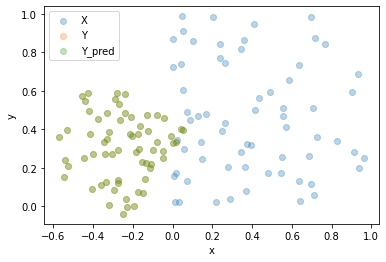

In [1]:
import numpy as np
from random import random
import math
import matplotlib.pyplot as plt

n = 64
c = random() + 0.5
theta = math.pi * random()
cs, ss = math.cos(theta), math.sin(theta)
R = np.array([[cs, -ss], [ss, cs]])
t = np.random.rand(2, 1)

noise = 0.0 * np.random.rand(2, n)
X = np.random.rand(2, n)
Y = c * R @ X + t + noise
h = np.ones((n, 1))
K = np.eye(n) - 1 / n * h @ h.T

U, D, V = np.linalg.svd(Y @ K @ X.T / n) 
S = np.diag([1,np.linalg.det(U) * np.linalg.det(V) ])
R_pred = U @ S @ V.T
c_pred = n * np.trace(np.diag(D) @ S) / np.trace(X @ K @ X.T)
t_pred = ((Y @ h) - c_pred * R_pred @ X @ h) / n
Y_pred = c_pred * R_pred @ X + t_pred

ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.scatter(x = X[0,:], y =X[1,:], label="X", color="tab:blue", alpha=0.3)
plt.scatter(x = Y[0,:], y =Y[1,:], label="Y", color="tab:orange", alpha=0.3)
plt.scatter(x = Y_pred[0,:], y =Y_pred[1,:], label="Y_pred", color="tab:green", alpha=0.3)
ax.legend()
plt.show()

## 参考

1. Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, S. Umeyama, 1991
1. Matrix Cookbook, Kaare Brandt Petersen, Michael Syskind Pedersen, 2005